
### PROBLEM STATEMENT 9: 

- The given dataset is from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.


### Here are what the columns represent:
 
- policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- with.cr.line: The number of days the borrower has had a credit line.
- bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- 2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- fully.paid: whether or not the borrower paid back their loan in full
  

#### QUESTIONS:

Q-1: Load the dataset and print the metadata in the notebook.

Q-2: Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.

Q-3: Print a heatmap to check NULL values.

Q-4: Perform startified splitting of train and test data.

Q-5: Build a classifier model using Adaboost Classifier algorithm.

Q-6: Print confusion matrix and classification report.

Q-7: Find out the stratified cross validation accuracy.


### Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### 1. Import the Data from Dataset

In [2]:
df = pd.read_csv("loan_data.csv")

Let's have a look at the data

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Metadata of the imported Dataset

In [4]:
df.shape

(9578, 14)

In [5]:
df.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

### 2. A countplot using sns showing the counts of loans by 'purpose',  with the color hue defined by 'not.fully.paid'

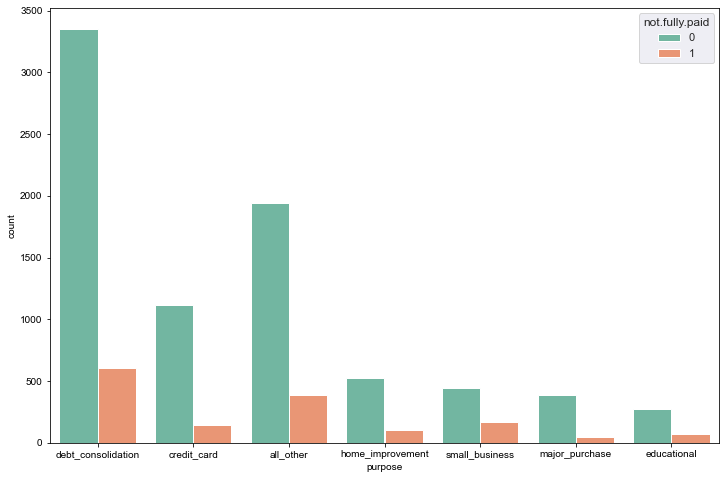

In [6]:
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.set_theme(style="darkgrid")
cp = sns.countplot(ax=ax, x="purpose", hue="not.fully.paid", data=df, palette="Set2")

EDA(Explarotary data analysis)

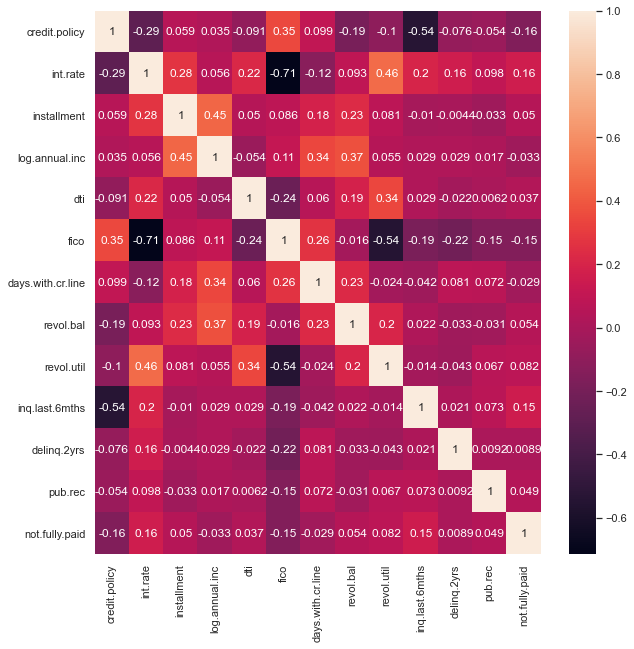

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 3. A heatmap to check NULL values

<AxesSubplot:>

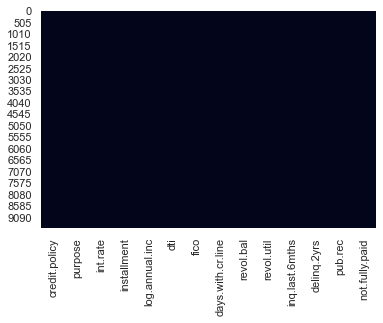

In [8]:
sns.heatmap(df.isnull(), cbar=False)

Assigning independent(features) and dependent(expected) varaibles

In [9]:
X = df.iloc[:,:-1] 
y = df["not.fully.paid"]

Encode all the categorical columns into numeric

In [10]:
le = LabelEncoder()
X["purpose"] = le.fit_transform(X["purpose"])

In [11]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


Do Feature Scaling on Independent variables

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)

###  4. Startified splitting of train and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

### 5. A classifier model using Adaboost Classifier algorithm

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(random_state = 0)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

### 6.Confusion matrix and classification report

In [15]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8382045929018789


In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1593   16]
 [ 294   13]]


0.8382045929018789

In [17]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.99      0.91      1609
     class 1       0.45      0.04      0.08       307

    accuracy                           0.84      1916
   macro avg       0.65      0.52      0.49      1916
weighted avg       0.78      0.84      0.78      1916



### 7. Find out the stratified cross validation accuracy

In [18]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(X , y): 
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    abc.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(abc.score(x_test_fold, y_test_fold)) 
   
# Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.837160751565762, 0.8475991649269311, 0.8382045929018789, 0.8413361169102297, 0.8382045929018789, 0.8423799582463466, 0.8361169102296451, 0.8392484342379958, 0.8380355276907001, 0.8359456635318704]

Maximum Accuracy That can be obtained from this model is: 84.75991649269311 %

Minimum Accuracy: 83.59456635318703 %

Overall Accuracy: 83.94231713143239 %

Standard Deviation is: 0.003532668833584607
